In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import spearmanr
import statsmodels.api as sm
%matplotlib inline

Import all libraries first

In [3]:
gdp_df=pd.read_csv('data/gdp_per_capita.csv')
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
6497,Zimbabwe,1992,2591.007534,NaN
6498,Zimbabwe,1991,2906.272849,NaN
6499,Zimbabwe,1990,2819.549467,NaN
6500,footnoteSeqID,Footnote,NaN,NaN
6501,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


Yes. The last 2 rows with row numbers 6500 and 6501 has garbage data. 

In [4]:
gdp_df=pd.read_csv('data/gdp_per_capita.csv',skipfooter =2,engine = 'python')

gdp file has 6502 rows and 4 columns. data types are object and float64

In [5]:
gdp_df.drop(['Value Footnotes'], axis=1)

,Country or Area,Year,Value
0,Afghanistan,2017,1758.465636
1,Afghanistan,2016,1757.023490
2,Afghanistan,2015,1766.593077
3,Afghanistan,2014,1795.735834
4,Afghanistan,2013,1807.762344
5,Afghanistan,2012,1772.764974
6,Afghanistan,2011,1626.764793
7,Afghanistan,2010,1671.581238
8,Afghanistan,2009,1502.354073
9,Afghanistan,2008,1267.644939


In [6]:
gdp_df.rename(columns = {'Country or Area':'Country','Year':'Year','Value':'GDP_Per_Capita'})

,Country,Year,GDP_Per_Capita,Value Footnotes
0,Afghanistan,2017,1758.465636,NaN
1,Afghanistan,2016,1757.023490,NaN
2,Afghanistan,2015,1766.593077,NaN
3,Afghanistan,2014,1795.735834,NaN
4,Afghanistan,2013,1807.762344,NaN
5,Afghanistan,2012,1772.764974,NaN
6,Afghanistan,2011,1626.764793,NaN
7,Afghanistan,2010,1671.581238,NaN
8,Afghanistan,2009,1502.354073,NaN
9,Afghanistan,2008,1267.644939,NaN


In [7]:
gdp_df = gdp_df.drop(['Value Footnotes'], axis=1)

In [8]:
gdp_df.rename(columns = {'Country or Area':'Country','Year':'Year','Value':'GDP_Per_Capita'})

,Country,Year,GDP_Per_Capita
0,Afghanistan,2017,1758.465636
1,Afghanistan,2016,1757.023490
2,Afghanistan,2015,1766.593077
3,Afghanistan,2014,1795.735834
4,Afghanistan,2013,1807.762344
5,Afghanistan,2012,1772.764974
6,Afghanistan,2011,1626.764793
7,Afghanistan,2010,1671.581238
8,Afghanistan,2009,1502.354073
9,Afghanistan,2008,1267.644939


In [9]:
continents=pd.read_csv('data/continents.csv')
 

In [10]:
gdp_df=gdp_df.rename(columns = {'Country or Area':'Country','Year':'Year','Value':'GDP_Per_Capita'})

In [11]:
 gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2017,1758.465636
1,Afghanistan,2016,1757.023490
2,Afghanistan,2015,1766.593077
3,Afghanistan,2014,1795.735834
4,Afghanistan,2013,1807.762344
5,Afghanistan,2012,1772.764974
6,Afghanistan,2011,1626.764793
7,Afghanistan,2010,1671.581238
8,Afghanistan,2009,1502.354073
9,Afghanistan,2008,1267.644939


The below code will show you all the rows where country name equals CÃ´te d'Ivoire. Just like Where condition in SQL

In [12]:
print(gdp_df.loc[gdp_df['Country'] =="CÃ´te d'Ivoire"])

            Country  Year  GDP_Per_Capita
792  CÃ´te d'Ivoire  2017     3564.595846
793  CÃ´te d'Ivoire  2016     3395.088932
794  CÃ´te d'Ivoire  2015     3225.188859
795  CÃ´te d'Ivoire  2014     3038.844827
796  CÃ´te d'Ivoire  2013     2864.048627
797  CÃ´te d'Ivoire  2012     2696.191639
798  CÃ´te d'Ivoire  2011     2495.495125
799  CÃ´te d'Ivoire  2010     2673.013083
800  CÃ´te d'Ivoire  2009     2682.036638
801  CÃ´te d'Ivoire  2008     2657.672981
802  CÃ´te d'Ivoire  2007     2650.485963
803  CÃ´te d'Ivoire  2006     2662.330254
804  CÃ´te d'Ivoire  2005     2679.787386
805  CÃ´te d'Ivoire  2004     2690.738762
806  CÃ´te d'Ivoire  2003     2714.011379
807  CÃ´te d'Ivoire  2002     2810.189031
808  CÃ´te d'Ivoire  2001     2922.033952
809  CÃ´te d'Ivoire  2000     2989.146720
810  CÃ´te d'Ivoire  1999     3132.638498
811  CÃ´te d'Ivoire  1998     3170.407545
812  CÃ´te d'Ivoire  1997     3113.038123
813  CÃ´te d'Ivoire  1996     3095.960786
814  CÃ´te d'Ivoire  1995     2968

In [13]:
gdp_df= gdp_df.replace(to_replace="CÃ´te d'Ivoire",value="Ivory Coast")

In [14]:
print(gdp_df.loc[gdp_df['Country'] =="CÃ´te d'Ivoire"])

Empty DataFrame
Columns: [Country, Year, GDP_Per_Capita]
Index: []


In [15]:
print(gdp_df.loc[gdp_df['Country'] =="Ivory Coast"])

         Country  Year  GDP_Per_Capita
792  Ivory Coast  2017     3564.595846
793  Ivory Coast  2016     3395.088932
794  Ivory Coast  2015     3225.188859
795  Ivory Coast  2014     3038.844827
796  Ivory Coast  2013     2864.048627
797  Ivory Coast  2012     2696.191639
798  Ivory Coast  2011     2495.495125
799  Ivory Coast  2010     2673.013083
800  Ivory Coast  2009     2682.036638
801  Ivory Coast  2008     2657.672981
802  Ivory Coast  2007     2650.485963
803  Ivory Coast  2006     2662.330254
804  Ivory Coast  2005     2679.787386
805  Ivory Coast  2004     2690.738762
806  Ivory Coast  2003     2714.011379
807  Ivory Coast  2002     2810.189031
808  Ivory Coast  2001     2922.033952
809  Ivory Coast  2000     2989.146720
810  Ivory Coast  1999     3132.638498
811  Ivory Coast  1998     3170.407545
812  Ivory Coast  1997     3113.038123
813  Ivory Coast  1996     3095.960786
814  Ivory Coast  1995     2968.016191
815  Ivory Coast  1994     2864.251321
816  Ivory Coast  1993   

In [16]:
some_values = ("CuraÃ§ao","CSÃ£o TomÃ© and Principe","Sint Maarten (Dutch part)")
#print(some_values)
#print(gdp_df.loc[gdp_df['Country'] =="CSÃ£o TomÃ© and Principe"])
#print(gdp_df.loc[gdp_df['Country'].isin (some_values)])
gdp_df= gdp_df.replace(to_replace="CuraÃ§ao",value="Curaçao")
gdp_df= gdp_df.replace(to_replace="CSÃ£o TomÃ© and Principe",value="Sao Tome and Principe")
gdp_df= gdp_df.replace(to_replace="Sint Maarten (Dutch part)",value="Sint Maarten")
print(gdp_df.loc[gdp_df['Country'].isin (some_values)])


Empty DataFrame
Columns: [Country, Year, GDP_Per_Capita]
Index: []


In [17]:
gdp_df=pd.merge(gdp_df,continents,how='inner')

In [18]:
gdp_df


,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2017,1758.465636,Asia
1,Afghanistan,2016,1757.023490,Asia
2,Afghanistan,2015,1766.593077,Asia
3,Afghanistan,2014,1795.735834,Asia
4,Afghanistan,2013,1807.762344,Asia
5,Afghanistan,2012,1772.764974,Asia
6,Afghanistan,2011,1626.764793,Asia
7,Afghanistan,2010,1671.581238,Asia
8,Afghanistan,2009,1502.354073,Asia
9,Afghanistan,2008,1267.644939,Asia


In [19]:
gdp_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5208 entries, 0 to 5207
Data columns (total 4 columns):
Country           5208 non-null object
Year              5208 non-null int64
GDP_Per_Capita    5208 non-null float64
Continent         5208 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 203.4+ KB


In [20]:
%%time
gdp_df.groupby('Continent').GDP_Per_Capita.mean()


CPU times: user 1.46 ms, sys: 868 µs, total: 2.33 ms
Wall time: 2.01 ms


Continent
Africa            4614.198209
Asia             21174.893215
Europe           26497.245133
North America    19228.818275
Oceania           8818.318792
South America    10989.950644
Name: GDP_Per_Capita, dtype: float64

In [21]:
continents['Continent'].dtype


dtype('O')

In [22]:
continents['Continent'] = continents['Continent'].astype('category')
continents['Continent'].dtype

CategoricalDtype(categories=['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
                  'South America'],
                 ordered=False)

In [23]:
%%time
gdp_df.groupby('Continent').GDP_Per_Capita.mean()


CPU times: user 1.27 ms, sys: 597 µs, total: 1.87 ms
Wall time: 1.34 ms


Continent
Africa            4614.198209
Asia             21174.893215
Europe           26497.245133
North America    19228.818275
Oceania           8818.318792
South America    10989.950644
Name: GDP_Per_Capita, dtype: float64

The total sys CPU when continent was object type was 4.24 ms and after changing it to categorical it reduced it to 2.52 ms

In [24]:
gdp_df.Continent.unique()
gdp_df.Continent.value_counts()


Africa           1383
Europe           1202
Asia             1183
North America     742
Oceania           365
South America     333
Name: Continent, dtype: int64

In [25]:
gdp_df.groupby('Continent').Country.nunique()

Continent
Africa           52
Asia             44
Europe           45
North America    28
Oceania          14
South America    12
Name: Country, dtype: int64

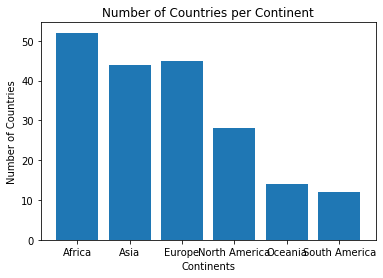

In [26]:
x = gdp_df.groupby('Continent').Country.nunique().reset_index(name="counts")
x
xvalues = list(x.Continent)
yvalues = list(x.counts)

#fig,ax = plt.subplots(figsize=(7,3))
plt.bar(xvalues,yvalues)
plt.title('Number of Countries per Continent')
plt.xlabel('Continents')
plt.ylabel('Number of Countries') ;

In [27]:
gdp_df.groupby('Continent').Country.nunique().reset_index(name="counts")

,Continent,counts
0,Africa,52
1,Asia,44
2,Europe,45
3,North America,28
4,Oceania,14
5,South America,12


In [28]:
df=gdp_df.groupby('Continent').Country.nunique().reset_index(name="number_of_countries")

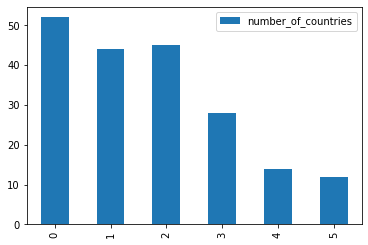

In [29]:
df.plot(kind='bar')


In [30]:
 gdp_df.Country.nunique()
#gdp_df.Year.max()
#gdp_df.Year.min()
    

195

12. 195 countries are represented and the range of years is 1990-2017


In [31]:
gdp_2014=gdp_df.loc[gdp_df['Year']==2014]
gdp_2014


,Country,Year,GDP_Per_Capita,Continent
3,Afghanistan,2014,1795.735834,Asia
19,Albania,2014,10700.522802,Europe
47,Algeria,2014,13549.025150,Africa
75,Angola,2014,6813.052106,Africa
103,Antigua and Barbuda,2014,20820.551057,North America
131,Argentina,2014,18935.002497,South America
159,Armenia,2014,7954.195331,Europe
187,Aruba,2014,36172.933355,North America
215,Australia,2014,43672.130373,Oceania
243,Austria,2014,44246.893265,Europe


In [32]:
gdp_2014.groupby('Country').GDP_Per_Capita.mean().sort_values(ascending=False)


Country
Macao SAR, China            130439.187070
Qatar                       116693.507701
Luxembourg                   92349.186486
Singapore                    81965.361071
Brunei                       76448.593329
Kuwait                       72588.486007
Norway                       63419.314779
United Arab Emirates         62948.677902
Cayman Islands               62929.874528
Switzerland                  57218.027926
San Marino                   56110.339084
Hong Kong SAR, China         52789.412215
United States                52080.792568
Saudi Arabia                 49731.779296
Ireland                      48808.882265
Netherlands                  46238.209702
Denmark                      45057.074170
Austria                      44246.893265
Sweden                       44213.877969
Bahrain                      43847.909052
Australia                    43672.130373
Germany                      43666.765146
Canada                       43137.713761
Iceland                   

15. Country with highest GDP per capita is Macao SAR, China.  
    Country wiht lowest GDP per capita is Mauritania
    Top 5 countries are 
Macao SAR, China
Qatar                      
Luxembourg                 
Singapore                   
Brunei                       

In [33]:
gdp_2014.groupby('Country').GDP_Per_Capita.mean().describe()

count       192.000000
mean      18867.436979
std       20704.071428
min         377.908916
25%        4162.098972
50%       12092.070598
75%       26540.135519
max      130439.187070
Name: GDP_Per_Capita, dtype: float64

In [34]:
gdp_2014['GDP_Group']=True


/Users/sbussa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
 
gdp_2014.groupby('Country').GDP_Per_Capita.mean().sort_values(ascending=False)

Country
Macao SAR, China            130439.187070
Qatar                       116693.507701
Luxembourg                   92349.186486
Singapore                    81965.361071
Brunei                       76448.593329
Kuwait                       72588.486007
Norway                       63419.314779
United Arab Emirates         62948.677902
Cayman Islands               62929.874528
Switzerland                  57218.027926
San Marino                   56110.339084
Hong Kong SAR, China         52789.412215
United States                52080.792568
Saudi Arabia                 49731.779296
Ireland                      48808.882265
Netherlands                  46238.209702
Denmark                      45057.074170
Austria                      44246.893265
Sweden                       44213.877969
Bahrain                      43847.909052
Australia                    43672.130373
Germany                      43666.765146
Canada                       43137.713761
Iceland                   

In [36]:
gdp_2014.GDP_Per_Capita.describe()


count       192.000000
mean      18867.436979
std       20704.071428
min         377.908916
25%        4162.098972
50%       12092.070598
75%       26540.135519
max      130439.187070
Name: GDP_Per_Capita, dtype: float64

In [37]:
describeValues=gdp_2014.GDP_Per_Capita.describe()


In [38]:
type(describeValues)

pandas.core.series.Series

In [39]:
describeValues

count       192.000000
mean      18867.436979
std       20704.071428
min         377.908916
25%        4162.098972
50%       12092.070598
75%       26540.135519
max      130439.187070
Name: GDP_Per_Capita, dtype: float64

In [40]:
Q1=describeValues['25%']
Q2=describeValues['50%']
Q3=describeValues['75%']

print(Q1)
print(Q2)
print(Q3)
 


4162.09897217198
12092.0705980161
26540.135519438278


In [41]:
  
def getGroup(gdp):
    
    if gdp < Q1:
        return "Low"
    elif gdp > Q1 and gdp <Q3:
        return "Medium"
    elif gdp >Q3:
        return "High"
        

gdp_2014['GDP_Group']= gdp_2014.GDP_Per_Capita.apply(getGroup)

/Users/sbussa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [42]:
gdp_2014

,Country,Year,GDP_Per_Capita,Continent,GDP_Group
3,Afghanistan,2014,1795.735834,Asia,Low
19,Albania,2014,10700.522802,Europe,Medium
47,Algeria,2014,13549.025150,Africa,Medium
75,Angola,2014,6813.052106,Africa,Medium
103,Antigua and Barbuda,2014,20820.551057,North America,Medium
131,Argentina,2014,18935.002497,South America,Medium
159,Armenia,2014,7954.195331,Europe,Medium
187,Aruba,2014,36172.933355,North America,High
215,Australia,2014,43672.130373,Oceania,High
243,Austria,2014,44246.893265,Europe,High


In [43]:
gdp_2014.groupby(['Continent','GDP_Group'],sort=True).Country.nunique()

Continent      GDP_Group
Africa         High          1
               Low          33
               Medium       16
Asia           High         13
               Low           7
               Medium       24
Europe         High         23
               Medium       22
North America  High          9
               Low           1
               Medium       17
Oceania        High          2
               Low           7
               Medium        5
South America  Medium       12
Name: Country, dtype: int64

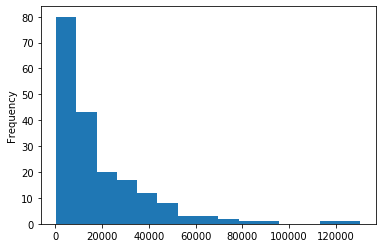

In [44]:
gdp_2014['GDP_Per_Capita'].plot(kind='hist',bins=15)

The distribution is right skewed.

In [45]:
stats.skew(gdp_2014['GDP_Per_Capita'],axis=0,bias=True)

2.2211880718105435

17. yes. The skewness value make sense because the histogram is right skewed and for right skewed the skew value is greater than ZERO 

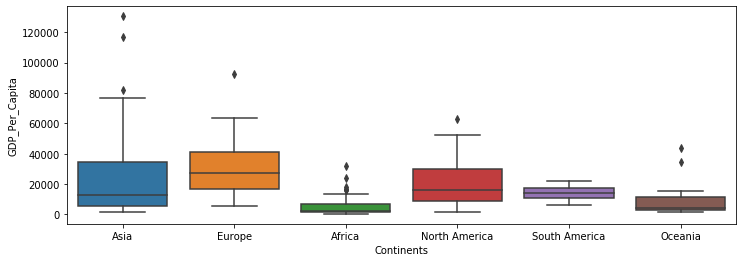

In [46]:
fig,ax = plt.subplots(figsize=(12,4))
sns.boxplot( x=gdp_2014['Continent'], y=gdp_2014['GDP_Per_Capita'])
plt.xlabel('Continents')
plt.ylabel('GDP_Per_Capita');


Continent Africa has lower average GDP than any other continent and Asia has few countries which has very high GDP per capita as I can see outliers.

Pivot the data (using the pandas `.pivot()` method) so that we can calculate % change in GDP Per Capita from 1990 to 2017 - drop any countries that are missing GDP numbers for at least one of these two years.

In [47]:
some_years = {'1990','2017'}
gdp_in_years=gdp_df.loc[gdp_df['Year'].isin(some_years)]
gdp_in_years

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2017,1758.465636,Asia
16,Albania,2017,11803.283883,Europe
43,Albania,1990,4458.247662,Europe
44,Algeria,2017,13876.294642,Africa
71,Algeria,1990,10297.842349,Africa
72,Angola,2017,6044.972035,Africa
99,Angola,1990,4761.229638,Africa
100,Antigua and Barbuda,2017,22855.748017,North America
127,Antigua and Barbuda,1990,17472.946483,North America
128,Argentina,2017,18945.144022,South America


In [48]:
gdp_pivot = pd.pivot(gdp_in_years,index='Country',values ='GDP_Per_Capita',columns='Year')


In [49]:
gdp_pivot=gdp_pivot.dropna()
gdp_pivot

Year,1990,2017
Country,,
Albania,4458.247662,11803.283883
Algeria,10297.842349,13876.294642
Angola,4761.229638,6044.972035
Antigua and Barbuda,17472.946483,22855.748017
Argentina,11372.823108,18945.144022
Armenia,3742.431024,8744.731368
Aruba,37140.024657,35861.828118
Australia,28669.495478,44888.019991
Austria,31341.902381,45493.045346


In [50]:
gdp_percent_change = gdp_pivot.pct_change(axis='columns')
gdp_percent_change
 


Year,1990,2017
Country,,
Albania,NaN,1.647516
Algeria,NaN,0.347495
Angola,NaN,0.269624
Antigua and Barbuda,NaN,0.308065
Argentina,NaN,0.665826
Armenia,NaN,1.336645
Aruba,NaN,-0.034416
Australia,NaN,0.565707
Austria,NaN,0.451509


In [51]:
percentage_positive=gdp_percent_change[gdp_percent_change[2017]>0].shape[0]/gdp_percent_change.shape[0]*100  

percentage_negative=gdp_percent_change[gdp_percent_change[2017]<0].shape[0]/gdp_percent_change.shape[0]*100

print(percentage_positive)
print(percentage_negative)


89.02439024390245
10.975609756097562


20. 88.95% of countries experienced a positive change and 11.04% countries experienced negative change.

21. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita from 1990 to 2017.
Ans. Equatorial Guinea hs the higest % change in GDP per capita.

In [52]:
 
gdp_percent_change.sort_values(by=2017,ascending =False)
 

Year,1990,2017
Country,,
Equatorial Guinea,NaN,20.909735
China,NaN,9.022572
Myanmar,NaN,6.682976
Vietnam,NaN,3.276556
Bhutan,NaN,2.928720
Cabo Verde,NaN,2.810484
Lao PDR,NaN,2.692917
India,NaN,2.419268
Sri Lanka,NaN,2.239780


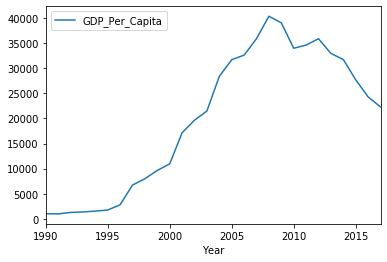

In [53]:
plot_guinea=gdp_df.loc[gdp_df['Country']=="Equatorial Guinea"]
plot_guinea.plot(kind='line',x='Year')


22.  Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?
Ans> China's GDP per capita is a constant growth when compared to Equatorial Guinea from 1990 to 2017. GDP is trending downward for Equatorial Guinea.

    

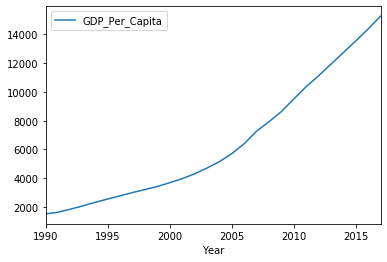

In [54]:
plot_china=gdp_df.loc[gdp_df['Country']=="China"]
plot_china.plot(kind='line',x='Year')

24. Read in internet_use.csv into a DataFrame called `internet_df`. You will most likely get an error message when doing this - figure out what is going wrong and fix it. Take a look at the first and last five rows and make any corrections to your `read_csv()` call to fix this. Again, **do not** modify the original datasets. 

In [55]:
 
internet_df=pd.read_csv('data/internet_use.csv',nrows=4495)


 25.How many rows and columns does this new dataset have? What are the types of its columns?
 Ans> 4495 rows and 4 columns. Data types of its columns are objec, int64, float64,float64.


26.	Change the columns for the Internet Users data frame to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [56]:
internet_df=internet_df.drop(['Value Footnotes'], axis=1)


In [57]:
internet_df=internet_df.rename(columns = {'Country or Area':'Country','Year':'Year','Value':'Internet_Users_Pct'})
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


27.	Merge `gdf_df` and `internet_df` (on Country and Year) into a single DataFrame named `gdp_and_internet_use`. Keep only countries and years that appear in both tables.

In [58]:
print(gdp_df.head())
print(internet_df.head())

       Country  Year  GDP_Per_Capita Continent
0  Afghanistan  2017     1758.465636      Asia
1  Afghanistan  2016     1757.023490      Asia
2  Afghanistan  2015     1766.593077      Asia
3  Afghanistan  2014     1795.735834      Asia
4  Afghanistan  2013     1807.762344      Asia
       Country  Year  Internet_Users_Pct
0  Afghanistan  2014            6.390000
1  Afghanistan  2013            5.900000
2  Afghanistan  2012            5.454545
3  Afghanistan  2011            5.000000
4  Afghanistan  2010            4.000000


In [59]:
gdp_and_internet_use=pd.merge(gdp_df,internet_df,how='inner')

In [60]:
print(gdp_and_internet_use.head())
print(gdp_and_internet_use.tail())


       Country  Year  GDP_Per_Capita Continent  Internet_Users_Pct
0  Afghanistan  2014     1795.735834      Asia            6.390000
1  Afghanistan  2013     1807.762344      Asia            5.900000
2  Afghanistan  2012     1772.764974      Asia            5.454545
3  Afghanistan  2011     1626.764793      Asia            5.000000
4  Afghanistan  2010     1671.581238      Asia            4.000000
       Country  Year  GDP_Per_Capita Continent  Internet_Users_Pct
3514  Zimbabwe  1997     3036.422224    Africa            0.033080
3515  Zimbabwe  1996     2985.856605    Africa            0.016790
3516  Zimbabwe  1995     2736.486436    Africa            0.007684
3517  Zimbabwe  1994     2768.309953    Africa            0.001739
3518  Zimbabwe  1990     2819.549467    Africa            0.000000


29. Create a new DataFrame, named `gdp_and_internet_use_2014` by extracting data for the year 2014 from `gdp_and_internet_use`. What is the mean internet users percentage in 2014? How many countries have at least 90% internet users in 2014?
Ans> mean internet users pecentage in 2014 is 44.67. 
   12 countries have at least 90% of internet users in 2014



In [61]:
gdp_and_internet_use_2014=gdp_and_internet_use.loc[gdp_and_internet_use['Year']==2014]
gdp_and_internet_use_2014.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,Asia,6.39
13,Albania,2014,10700.522802,Europe,60.10
34,Algeria,2014,13549.025150,Africa,18.09
56,Angola,2014,6813.052106,Africa,21.26
76,Antigua and Barbuda,2014,20820.551057,North America,64.00


In [62]:
gdp_and_internet_use_2014.mean()

Year                   2014.000000
GDP_Per_Capita        18417.785562
Internet_Users_Pct       44.673536
dtype: float64

In [63]:
gdp_and_internet_use_2014_byCountry=gdp_and_internet_use_2014.groupby('Country').mean()

gdp_and_internet_use_2014_byCountry=gdp_and_internet_use_2014_byCountry.reset_index()
gdp_and_internet_use_2014_byCountry.head()
#gdp_and_internet_use_2014_byCountry.sort_values(by='Internet_Users_Pct', ascending = False)

gdp_and_internet_use_2014_byCountry[gdp_and_internet_use_2014_byCountry.Internet_Users_Pct>90].count()


Country               12
Year                  12
GDP_Per_Capita        12
Internet_Users_Pct    12
dtype: int64

30. Find the countries that had the top 5 largest GDP per capita figures for 2014. Create a seaborn FacetGrid showing the change in internet user percentage over time for these five countries. What trends do you notice?
Ans> top 5 countries are 
    Qatar
    Luxembourg
    Singapore
    Kuwait
    Norway

In [64]:
#shows top 5 rows 
gdp_and_internet_use_2014_byCountry.nlargest(5,'GDP_Per_Capita')
 

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
119,Qatar,2014,116693.507701,91.49
84,Luxembourg,2014,92349.186486,94.67
129,Singapore,2014,81965.361071,82.00
77,Kuwait,2014,72588.486007,78.70
108,Norway,2014,63419.314779,96.30


In [65]:
Countries = {'Qatar','Luxembourg','Singapore','Kuwait','Norway'}

gdp_in_Countries=gdp_and_internet_use.loc[gdp_and_internet_use['Country'].isin(Countries)]
gdp_in_Countries

                     

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
1685,Kuwait,2014,72588.486007,Asia,78.700000
1686,Kuwait,2013,75597.292936,Asia,75.460000
1687,Kuwait,2012,78700.458568,Asia,70.450000
1688,Kuwait,2011,78021.671676,Asia,65.769071
1689,Kuwait,2010,75359.963489,Asia,61.400000
1690,Kuwait,2009,81861.379333,Asia,50.800000
1691,Kuwait,2008,93569.026932,Asia,42.000000
1692,Kuwait,2007,96846.868057,Asia,34.800000
1693,Kuwait,2006,96389.736834,Asia,28.791198
1694,Kuwait,2005,93734.075927,Asia,25.926108


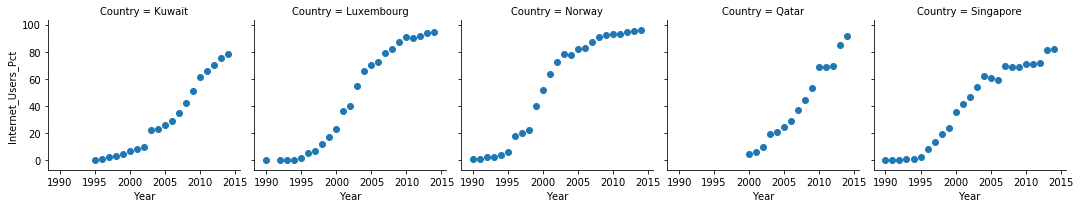

In [66]:

g = sns.FacetGrid(gdp_in_Countries, col="Country")
g.map(plt.scatter,'Year','Internet_Users_Pct');

31. Create a scatter plot of Internet Use vs GDP per Capita for the year 2014.

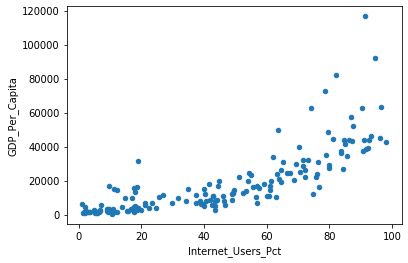

In [67]:
gdp_and_internet_use_2014.head()
gdp_and_internet_use_2014.plot(kind='scatter',x='Internet_Users_Pct',y='GDP_Per_Capita');


32.Find the correlation between GDP per Capita and Internet Use for the year 2014. What is the meaning of this number?

Ans> correlation between GDP per Capita and Internet Use in 2014 is 0.78. This indicate there is positive and an ok relation ship between two variables. Both variables change in same direction

In [68]:
#spearmanr(gdp_and_internet_use_2014.GDP_Per_Capita, gdp_and_internet_use_2014.Internet_Users_Pct)
gdp_and_internet_use_2014[['GDP_Per_Capita','Internet_Users_Pct']].corr()

,GDP_Per_Capita,Internet_Users_Pct
GDP_Per_Capita,1.000000,0.788247
Internet_Users_Pct,0.788247,1.000000


33. Using the statsmodels library, create an ordinary linear regression model with independent variable GDP per capita and dependent variable internet users percentage for the year 2014. Be sure to include an intercept term. Print the model summary. What R^2 value do you get for this model? What is the meaning of this number?

Ans> R^2 is 0.621. This tells us that this model is a an ok fit. Not that great. Closer to 1 is better.


In [69]:
X=gdp_and_internet_use_2014['GDP_Per_Capita']
X = sm.add_constant(X)
X.head()


/Users/sbussa/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,GDP_Per_Capita
0,1.0,1795.735834
13,1.0,10700.522802
34,1.0,13549.025150
56,1.0,6813.052106
76,1.0,20820.551057


In [70]:
Y=gdp_and_internet_use_2014['Internet_Users_Pct']

model = sm.OLS(Y, X)
result = model.fit()

In [71]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:     Internet_Users_Pct   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     265.8
Date:                Fri, 03 Apr 2020   Prob (F-statistic):           5.46e-36
Time:                        12:04:14   Log-Likelihood:                -706.88
No. Observations:                 164   AIC:                             1418.
Df Residuals:                     162   BIC:                             1424.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             22.4139      1.967     11.

34. Add a column to `gdp_and_internet_use_2014` and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and internet users percentage. Run an ordinary linear regression with response variable internet users and explanatory variable the log of the GDP per capita, and view the model summary. What is the meaning of the coefficients you get? Which of the two models that you created appears to do a better job?

Ans> The coefficient of 21.7941 means that for every increase in GDP per capita, the percentage average of internet users increases by 21.79 (logged).
Logged model is better as R sqaure(.77) is better than the non logged model(.62)

In [72]:
gdp_and_internet_use_2014['GDP_log']=gdp_and_internet_use_2014['GDP_Per_Capita'].apply(np.log)

/Users/sbussa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [73]:
gdp_and_internet_use_2014[['GDP_log','Internet_Users_Pct']].corr()
gdp_and_internet_use_2014.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct,GDP_log
0,Afghanistan,2014,1795.735834,Asia,6.39,7.493170
13,Albania,2014,10700.522802,Europe,60.10,9.278048
34,Algeria,2014,13549.025150,Africa,18.09,9.514070
56,Angola,2014,6813.052106,Africa,21.26,8.826595
76,Antigua and Barbuda,2014,20820.551057,North America,64.00,9.943696


In [74]:
X1=gdp_and_internet_use_2014['GDP_log']
X1=sm.add_constant(X)
Y1=gdp_and_internet_use_2014['Internet_Users_Pct']
mod=sm.OLS(Y1,X1)
res=mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:     Internet_Users_Pct   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     265.8
Date:                Fri, 03 Apr 2020   Prob (F-statistic):           5.46e-36
Time:                        12:04:14   Log-Likelihood:                -706.88
No. Observations:                 164   AIC:                             1418.
Df Residuals:                     162   BIC:                             1424.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             22.4139      1.967     11.

35. Filter the original dataset down to just the United States for all available years. Calculate correlation between internet use and gdp per capita. Is this meaningful or useful?

Ans>there is a strong correlation between GDP per capita and internet Users percentage in America.

In [75]:
USA = gdp_df[gdp_df['Country']=='United States']

In [76]:
USA = pd.merge(USA,internet_df,how='inner')
USA[['GDP_Per_Capita','Internet_Users_Pct']].corr()

,GDP_Per_Capita,Internet_Users_Pct
GDP_Per_Capita,1.000000,0.991618
Internet_Users_Pct,0.991618,1.000000


Successfully completed data Question 1.